<a href="https://colab.research.google.com/github/sunilhucharaddi/fastai-v3/blob/master/Breakfast_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  !curl -s https://course.fast.ai/setup/colab | bash


Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

**Create dataset of Breakfasts from google images**





In [0]:
folder = 'dosa'
file = 'dosa.txt'

In [0]:
folder = 'idli'
file = 'idli.txt'

In [0]:
folder = 'vada'
file = 'vada.txt'

In [0]:
folder = 'paratha'
file = 'paratha.txt'

In [0]:
folder = 'puri'
file = 'puri.txt'

In [0]:
folder = 'upma'
file = 'upma.txt'

In [0]:
folder = 'poha'
file = 'poha.txt'

In [0]:
!ls


data	  gdrive    models	 poha.txt  upma.txt
dosa.txt  idli.txt  paratha.txt  puri.txt  vada.txt


**TO SAVE AND WRITE INTO GOOGLE DRIVE**

In [0]:
/content/gdrive/My Drive

In [0]:
path = Path('gdrive/My Drive/data/breakfast')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
!ls

data  gdrive  models


In [0]:
from fastai.vision import *


In [11]:
path.ls()

[PosixPath('gdrive/My Drive/data/breakfast/dosa'),
 PosixPath('gdrive/My Drive/data/breakfast/idli'),
 PosixPath('gdrive/My Drive/data/breakfast/vada'),
 PosixPath('gdrive/My Drive/data/breakfast/paratha'),
 PosixPath('gdrive/My Drive/data/breakfast/puri'),
 PosixPath('gdrive/My Drive/data/breakfast/upma'),
 PosixPath('gdrive/My Drive/data/breakfast/poha'),
 PosixPath('gdrive/My Drive/data/breakfast/models')]

**Downloading images**

I follow lesson 2 notebook of fastai to scrape images from google images

In [0]:
download_images(file,dest,max_pics=500)

In [0]:
dest.ls()

In [0]:
classes = ['dosa','idli','vada','paratha', 'puri','upma','poha']

**Remove un-openable files**

In [0]:

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

dosa


idli


vada


paratha


puri


upma


poha


**Visualise the data**

In [0]:
np.random.seed(0)
data = ImageDataBunch.from_folder(path,train = ".",valid_pct = 0.2,
                                  ds_tfms = get_transforms(),size=224, num_workers=4).normalize(imagenet_stats)


In [19]:
data.classes

['dosa', 'idli', 'paratha', 'poha', 'puri', 'upma', 'vada']

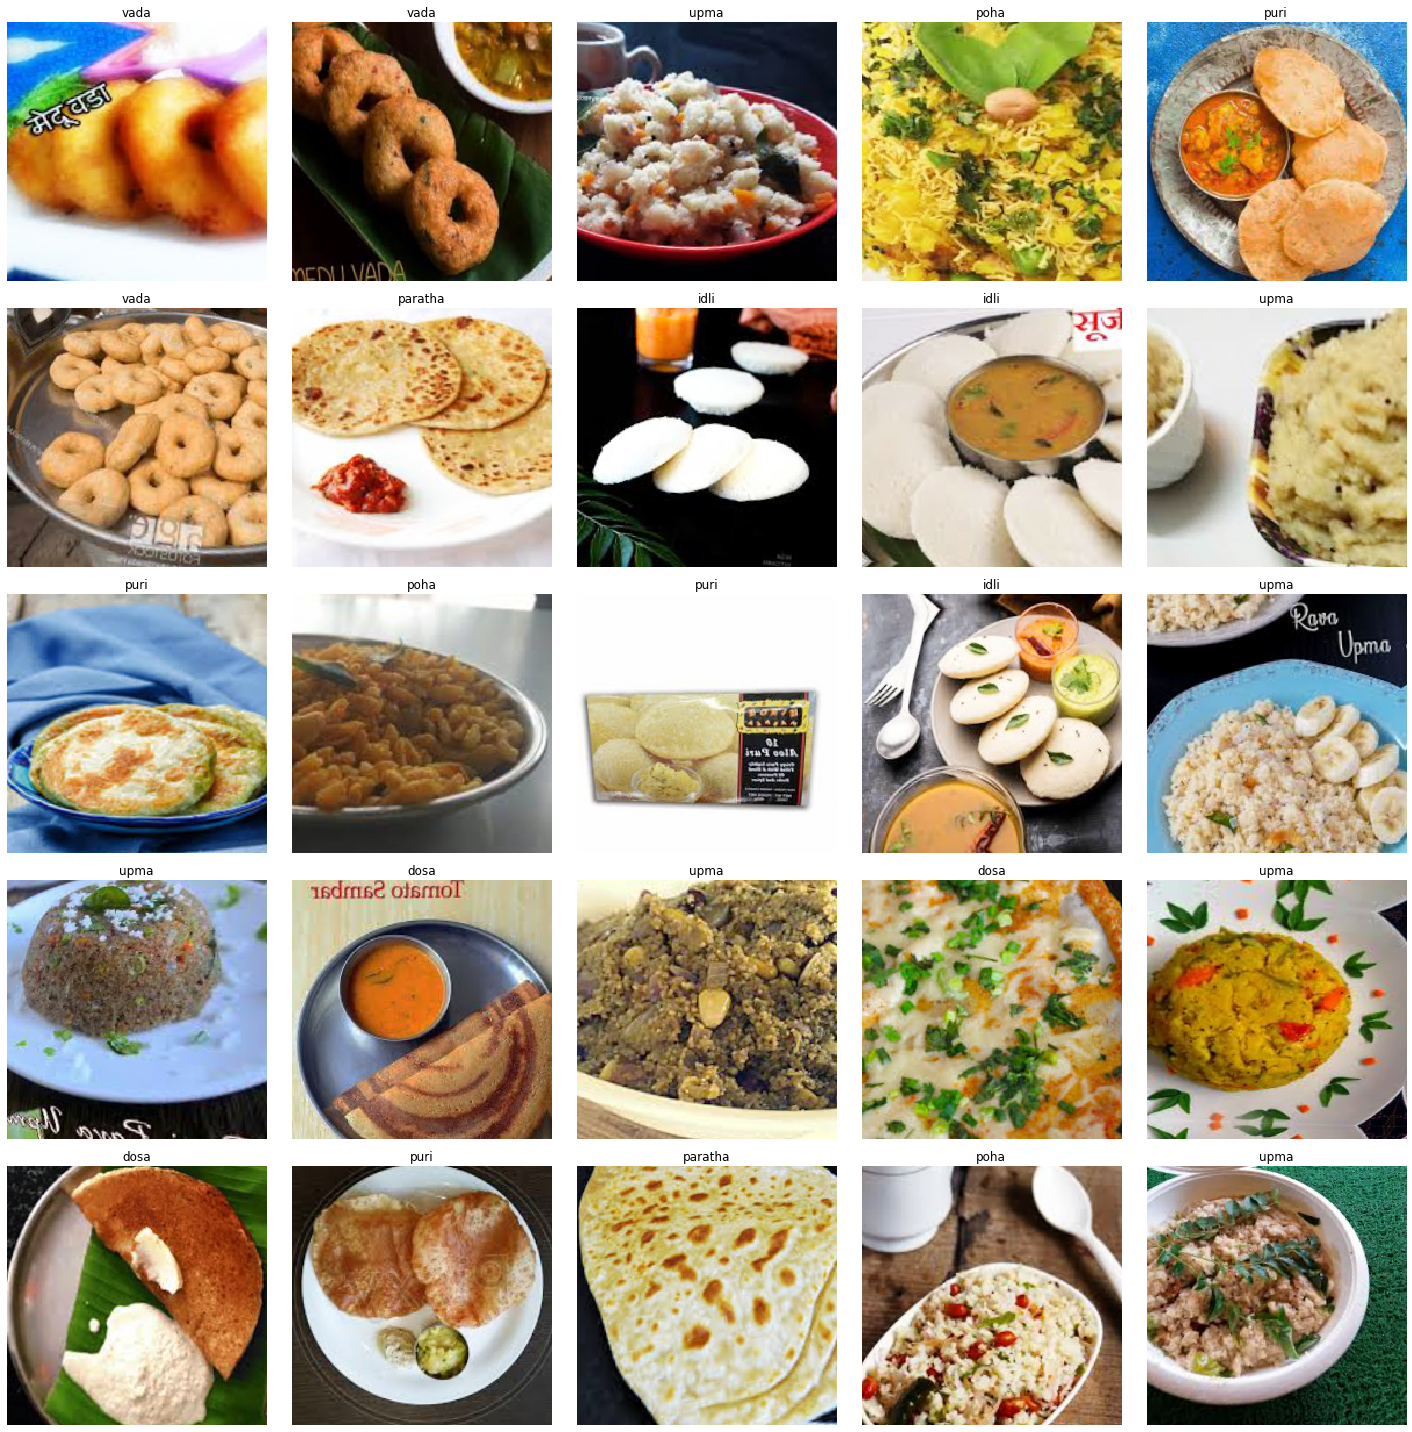

In [20]:
data.show_batch(rows= 5)

In [21]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 39.0MB/s]


In [22]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,2.162472,0.945975,0.262500,02:10
1,1.433430,0.914681,0.227500,00:21
2,1.079055,0.819122,0.212500,00:21
3,0.868539,0.797625,0.205000,00:21


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


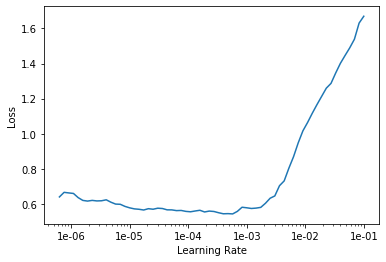

In [26]:
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.590544,0.650443,0.165000,00:20
1,0.451296,0.592584,0.147500,00:19


In [0]:
learn.save('stage-2')

**Interpretation**

In [29]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (1600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dosa,dosa,dosa,dosa,dosa
Path: gdrive/My Drive/data/breakfast;

Valid: LabelList (400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
idli,puri,puri,paratha,poha
Path: gdrive/My Drive/data/breakfast;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momen

In [30]:
interp = ClassificationInterpretation.from_learner(learn)


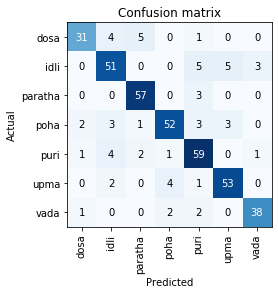

In [31]:
interp.plot_confusion_matrix()


**Cleaning Up the data**

In [0]:
from fastai.widgets import *


grab images which have top losses and delete them, the following step doesn't delete it permanently, instead creates a new files

In [0]:
db = (ImageList.from_folder(path).split_none().label_from_folder().transform(get_transforms(),size=224).databunch())

In [0]:
learn_cln = cnn_learner(db,models.resnet34,metrics= error_rate)
learn_cln.load('stage-2')

In [0]:
doc(cnn_learner)

In [0]:
from google.colab import widgets

In [48]:
!git clone https://github.com/muellerzr/ClassConfusion.git


Cloning into 'ClassConfusion'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 334 (delta 28), reused 0 (delta 0), pack-reused 284
Receiving objects: 100% (334/334), 2.13 MiB | 13.13 MiB/s, done.
Resolving deltas: 100% (194/194), done.


In [0]:
from ClassConfusion import *

In [0]:
ClassConfusion(interp, classes, is_ordered=False, figsize=(8,8))


In [0]:
import math
import pandas as pd
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

from itertools import permutations
from fastai.train import ClassificationInterpretation
from google.colab import widgets

class ClassConfusion():
    "Plot the most confused datapoints and statistics for the models misses." 
    def __init__(self, interp:ClassificationInterpretation, classlist:list, 
               is_ordered:bool=False, cut_off:int=100, varlist:list=None,
               figsize:tuple=(8,8)):
        self.interp = interp
        self._is_tab = (str(type(interp.learn.data)) == "<class 'fastai.tabular.data.TabularDataBunch'>")
        if self._is_tab:
            if interp.learn.data.train_ds.x.cont_names != []: 
                for x in range(len(interp.learn.data.procs)):
                      if "Normalize" in str(interp.learn.data.procs[x]):
                            self.means = interp.learn.data.train_ds.x.processor[0].procs[x].means
                            self.stds = interp.learn.data.train_ds.x.processor[0].procs[x].stds
        self.is_ordered = is_ordered
        self.cut_off = cut_off
        self.figsize = figsize
        self.classl = classlist
        self.varlist = varlist
        self._show_losses(classlist)            

    def _show_losses(self, classl:list, **kwargs):
        "Checks if the model is for Tabular or Images and gathers top losses"
        _, self.tl_idx = self.interp.top_losses(len(self.interp.losses))
        self._tab_losses() if self._is_tab else self._create_tabs()
        
    def _create_tabs(self):
        "Creates a tab for each variable"
        self.lis = self.classl if self.is_ordered else list(permutations(self.classl, 2))
        if self._is_tab:
            self._boxes = len(self.df_list)
            self._cols = math.ceil(math.sqrt(self._boxes))
            self._rows = math.ceil(self._boxes/self._cols)
            self.tbnames = list(self.df_list[0].columns)[:-1] if self.varlist is None else self.varlist
        else:
            vals = self.interp.most_confused()
            self._ranges = []
            self.tbnames = []
            self._boxes = int(input('Please enter a value for `k`, or the top images you will see: '))
            for x in iter(vals):
                for y in range(len(self.lis)):
                    if x[0:2] == self.lis[y]:
                        self._ranges.append(x[2])
                        self.tbnames.append(str(x[0] + ' | ' + x[1]))

        self.tb = widgets.TabBar(self.tbnames)
        self._populate_tabs()
        
    def _populate_tabs(self):
        "Adds relevant graphs to each tab"
        with tqdm(total=len(self.tbnames)) as pbar:
            for i, tab in enumerate(self.tbnames):
                with self.tb.output_to(i):
                    self._plot_tab(tab) if self._is_tab else self._plot_imgs(tab, i)
            pbar.update(1)

    def _plot_imgs(self, tab:str, i:int ,**kwargs):
        "Plots the most confused images"
        classes_gnd = self.interp.data.classes
        x = 0
        if self._ranges[i] < self._boxes:
            cols = math.ceil(math.sqrt(self._ranges[i]))
            rows = math.ceil(self._ranges[i]/cols)

        if self._ranges[i] < 4 or self._boxes < 4:
            cols = 2
            rows = 2
        else:
            cols = math.ceil(math.sqrt(self._boxes))
            rows = math.ceil(self._boxes/cols)
        fig, ax = plt.subplots(rows, cols, figsize=self.figsize)

        [axi.set_axis_off() for axi in ax.ravel()]
        for j, idx in enumerate(self.tl_idx):
            if self._boxes < x+1 or x > self._ranges[i]:
                break
            da, cl = self.interp.data.dl(self.interp.ds_type).dataset[idx]
            row = (int)(x / cols)
            col = x % cols

            ix = int(cl)
            if str(cl) == tab.split(' ')[0] and str(classes_gnd[self.interp.pred_class[idx]]) == tab.split(' ')[2]:
                img, lbl = self.interp.data.valid_ds[idx]
                fn = self.interp.data.valid_ds.x.items[idx]
                #fn = re.search('([^/*]+)_\d+.*$', str(fn)).group(0)
                img.show(ax=ax[row, col])
                ax[row,col].set_title(fn)
                x += 1
        plt.show(fig)
        plt.tight_layout()

    def _plot_tab(self, tab:str):
        "Generates graphs"
        if self._boxes is not None:
            fig, ax = plt.subplots(self._boxes, figsize=self.figsize)
        else:
            fig, ax = plt.subplots(self._cols, self._rows, figsize=self.figsize)
        fig.subplots_adjust(hspace=.5)
        for j, x in enumerate(self.df_list):
            title = f'{"".join(x.columns[-1])} {tab} distribution'
            if self._boxes is None:
                row = int(j / self._cols)
                col = j % row
            if tab in self.cat_names:
                vals = pd.value_counts(x[tab].values)
                if self._boxes is not None:
                    if vals.nunique() < 10:
                        fig = vals.plot(kind='bar', title=title,  ax=ax[j], rot=0, width=.75)
                    elif vals.nunique() > self.cut_off:
                        print(f'Number of values is above {self.cut_off}')
                    else:
                        fig = vals.plot(kind='barh', title=title,  ax=ax[j], width=.75)   
                else:
                    fig = vals.plot(kind='barh', title=title,  ax=ax[row, col], width=.75)
            else:
                vals = x[tab]
                if self._boxes is not None:
                    axs = vals.plot(kind='hist', ax=ax[j], title=title, y='Frequency')
                else:
                    axs = vals.plot(kind='hist', ax=ax[row, col], title=title, y='Frequency')
                axs.set_ylabel('Frequency')
                if len(set(vals)) > 1:
                    vals.plot(kind='kde', ax=axs, title=title, secondary_y=True)
                else:
                    print('Less than two unique values, cannot graph the KDE')
        plt.show(fig)
        plt.tight_layout()
        
    def _tab_losses(self, **kwargs):
        "Gathers dataframes of the combinations data"
        classes = self.interp.data.classes
        cat_names = self.interp.data.x.cat_names
        cont_names = self.interp.data.x.cont_names
        comb = self.classl if self.is_ordered else list(permutations(self.classl,2))

        self.df_list = []
        arr = []
        for i, idx in enumerate(self.tl_idx):
            da, _ = self.interp.data.dl(self.interp.ds_type).dataset[idx]
            res = ''
            for c, n in zip(da.cats, da.names[:len(da.cats)]):
                string = f'{da.classes[n][c]}'
                if string == 'True' or string == 'False':
                    string += ';'
                    res += string

                else:
                    string = string[1:]
                    res += string + ';'
            for c, n in zip(da.conts, da.names[len(da.cats):]):
                res += f'{c:.4f};'
            arr.append(res)
        f = pd.DataFrame([ x.split(';')[:-1] for x in arr], columns=da.names)
        for i, var in enumerate(self.interp.data.cont_names):
            f[var] = f[var].apply(lambda x: float(x) * self.stds[var] + self.means[var])
        f['Original'] = 'Original'
        self.df_list.append(f)

        for j, x in enumerate(comb):
            arr = []
            for i, idx in enumerate(self.tl_idx):
                da, cl = self.interp.data.dl(self.interp.ds_type).dataset[idx]
                cl = int(cl)

                if classes[self.interp.pred_class[idx]] == comb[j][0] and classes[cl] == comb[j][1]:
                    res = ''
                    for c, n in zip(da.cats, da.names[:len(da.cats)]):
                        string = f'{da.classes[n][c]}'
                        if string == 'True' or string == 'False':
                            string += ';'
                            res += string
                        else:
                            string = string[1:]
                            res += string + ';'
                    for c, n in zip(da.conts, da.names[len(da.cats):]):
                        res += f'{c:.4f};'
                    arr.append(res)      
            f = pd.DataFrame([ x.split(';')[:-1] for x in arr], columns=da.names)
            for i, var in enumerate(self.interp.data.cont_names):
                f[var] = f[var].apply(lambda x: float(x) * self.stds[var] + self.means[var])
            f[str(x)] = str(x)
            self.df_list.append(f)
        self.cat_names = cat_names
        self._create_tabs() 

In [64]:
path

PosixPath('gdrive/My Drive/data/breakfast')

**Putting our model for production**

In [0]:
learn.export()##creates pkl file

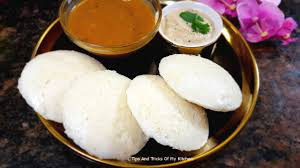

In [65]:
img = open_image(path/'idli'/'00000021.jpg')
img

In [0]:
learn = load_learner(path)


In [67]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class


Category idli

**Try with high learning rate**

In [68]:
learn  = cnn_learner(data,models.resnet34,metrics=error_rate)
learn.fit_one_cycle(1,max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,24.755095,2857.062256,0.850000,00:18


In [69]:
learn.fit_one_cycle(5, max_lr=1e-5)


epoch,train_loss,valid_loss,error_rate,time
0,17.655296,13.138139,0.667500,00:18
1,17.969097,12.621720,0.652500,00:18
2,18.122375,12.745535,0.662500,00:18
3,18.114246,12.527846,0.655000,00:19
4,18.103153,12.711468,0.662500,00:19


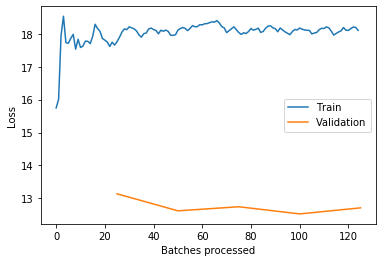

In [70]:
learn.recorder.plot_losses()

**Train for TOO many epochs**

In [0]:
data = ImageDataBunch.from_folder(path, train= ".",valid_pct= 0.9,bs=32,
                                  ds_tfms = get_transforms(do_flip=False,max_rotate=0,max_zoom=1,max_lighting=0,max_warp= 0
                                                          ),size=224,num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)
learn.unfreeze()

In [74]:
learn.fit_one_cycle(40,slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,3.037008,2.771756,0.821111,00:13
1,3.067991,2.406458,0.820000,00:13
2,3.077131,2.354272,0.827778,00:13
3,3.117566,2.336730,0.825556,00:13
4,3.113487,2.285596,0.806667,00:12
5,3.039862,2.220144,0.789444,00:13
6,2.985535,2.138141,0.768889,00:13
7,2.837409,2.039784,0.735556,00:12
8,2.722421,1.932423,0.704444,00:13
9,2.640701,1.824405,0.665000,00:13
